In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
pd_data = pd.read_csv(url, header=None)
np_data = pd_data.to_numpy()
print(np_data[:5], np_data.shape)

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']] (150, 5)


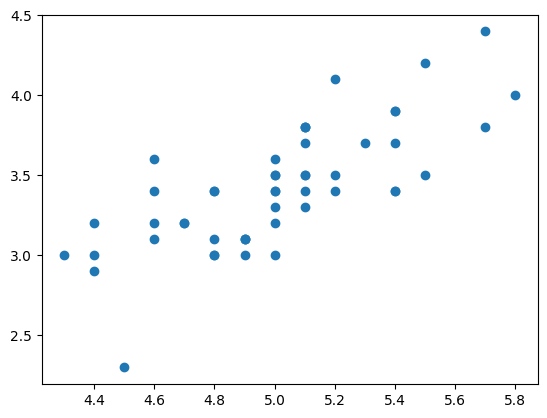

In [69]:
sub_data = np_data[:50,[0,1]].astype(np.float64)
# sub_data = np_data[:,:2]
# print(sub_data)

_, axe = plt.subplots()
axe.scatter(sub_data[:,0], sub_data[:,1])

0.8072336651226961 -0.6230117276042169


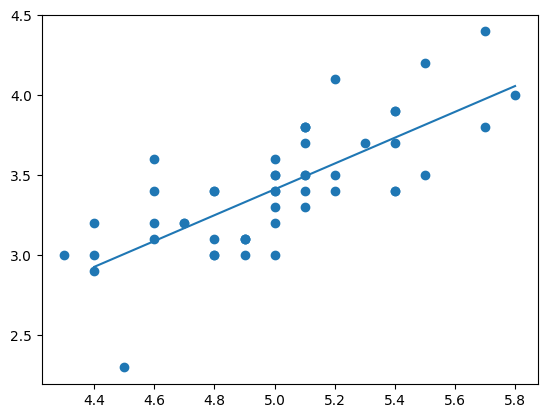

In [70]:
# y = ax + b
# a = (x와 y의 상관관계 계수) * (y std_dev / x std_dev)
# b = mean_y - (a * mean_x)

# x와 y의 상관관계 계수
xs = sub_data[:,0]
ys = sub_data[:,1]
corr = np.corrcoef(xs, ys)[0,1]

std_x = np.std(xs)
std_y = np.std(ys)
mean_x = np.mean(xs)
mean_y = np.mean(ys)
# print(std_x, std_y, mean_x, mean_y)

a = corr * (std_y/std_x)
b = mean_y - (a*mean_x)
print(a,b)

_, axe = plt.subplots()
axe.scatter(xs,ys)

# 회귀선
# y = 0.81x - 0.62 식을 그린 것!
axe.plot(np.linspace(4.4, 5.8, 100), a*np.linspace(4.4,5.8,100)+b)


In [71]:
# y = 0.81x - 0.62
# print(sub_data)

ys_pred = a*xs+b
# print(ys_pred)

err = ys_pred - ys
print(err)

# SSE : squared sum of err
print(np.sum(err**2))

[-0.00612004  0.33243323 -0.0290135  -0.00973687 -0.1868434  -0.16394994
 -0.30973687  0.0131566   0.0288164   0.23243323  0.03605006 -0.14829014
  0.25170986 -0.15190697  0.05894353 -0.42177984 -0.16394994 -0.00612004
  0.17822016 -0.30612004  0.33605006 -0.20612004 -0.50973687  0.19387996
 -0.14829014  0.4131566   0.0131566   0.07460333  0.17460333 -0.0290135
  0.15170986  0.33605006 -0.52539667 -0.38322657  0.23243323  0.2131566
  0.31677343  0.23243323 -0.0711836   0.09387996 -0.0868434   0.70953977
 -0.2711836  -0.0868434  -0.30612004  0.25170986 -0.30612004 -0.10973687
 -0.0446733   0.1131566 ]
3.146569429387998


In [72]:
xs = np_data[:50,2].astype(np.float64)
ys = np_data[:50,3].astype(np.float64)
print(xs)   #길이
print(ys)   #폭

[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.5 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]
[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2]


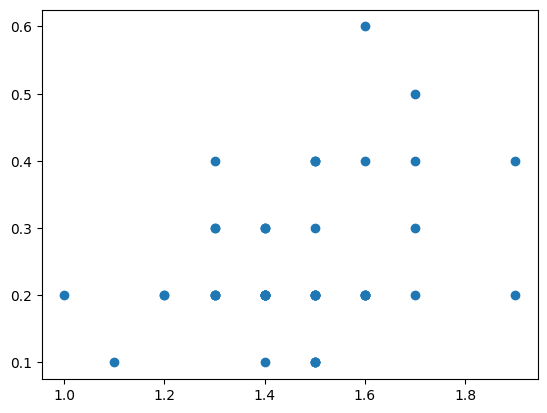

In [73]:
# sub_data = np_data[:50,[2,3]].astype(np.float64)

# _, axe = plt.subplots()
# axe.scatter(sub_data[:,0], sub_data[:,1])

_, axe = plt.subplots()
axe.scatter(xs, ys)


0.30630821115803575
0.8072336651226961 -0.6230117276042169


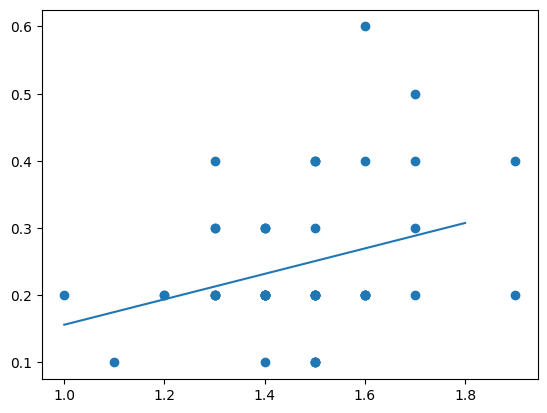

In [76]:
# x와 y의 상관관계 계수
corr = np.corrcoef(xs, ys)[0,1]
print(corr) # 0에 가까울수록 상관도가 낮다

std_x = np.std(xs)
std_y = np.std(ys)
mean_x = np.mean(xs)
mean_y = np.mean(ys)

slope = corr * (std_y/std_x)
intercept = mean_y - (slope*mean_x)
print(a,b)

_, axe = plt.subplots()
axe.scatter(xs,ys)

# 회귀선
# y = slopex + intercept 식을 그린 것!
axe.plot(np.linspace(1.0, 1.8, 100), slope*np.linspace(1.0, 1.8,100)+intercept)

In [79]:
ys_pred = slope*xs+intercept

err = ys_pred - ys
print(err)

sse = np.sum(err**2)
print('SSE :', sse)

[ 0.0318872   0.0318872   0.01296095  0.05081345  0.0318872  -0.11133406
 -0.0681128   0.05081345  0.0318872   0.15081345  0.05081345  0.0697397
  0.1318872   0.07510846 -0.00596529 -0.14918655 -0.18703905 -0.0681128
 -0.01133406 -0.04918655  0.08866594 -0.14918655 -0.04381779 -0.21133406
  0.12651844  0.0697397  -0.1302603   0.05081345  0.0318872   0.0697397
  0.0697397  -0.14918655  0.15081345  0.0318872   0.15081345 -0.00596529
  0.01296095  0.15081345  0.01296095  0.05081345 -0.08703905 -0.08703905
  0.01296095 -0.3302603  -0.07348156 -0.0681128   0.0697397   0.0318872
  0.05081345  0.0318872 ]
SSE : 0.5103579175704989
